In [172]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import gpxpy
import os

In [160]:
gpx_folder = 'user_profiles' # Directory containing GPX files
data = []

In [161]:
# Iterate over GPX files in the folder
for filename in os.listdir(gpx_folder):
    if filename.endswith('.gpx'):
        # Load GPX file
        gpx_file_path = os.path.join(gpx_folder, filename)
        with open(gpx_file_path, 'r') as file:
            gpx = gpxpy.parse(file)

        # Extract data from GPX file
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    latitude = point.latitude
                    longitude = point.longitude
                    elevation = point.elevation
                    time = point.time
                    # Append extracted data to the list
                    data.append({'Latitude': latitude, 'Longitude': longitude, 'Elevation': elevation, 'Time': time})

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

In [162]:
df = df[['Latitude', 'Longitude']]

In [163]:
df

,Latitude,Longitude
0,59.323897,18.027848
1,59.337643,18.040814
2,59.281555,18.072441
3,59.376884,18.058042
4,59.339617,18.069756
...,...,...
2086,59.332664,18.030749
2087,59.372407,18.095452
2088,59.294905,18.115615
2089,59.326691,18.047583


In [164]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

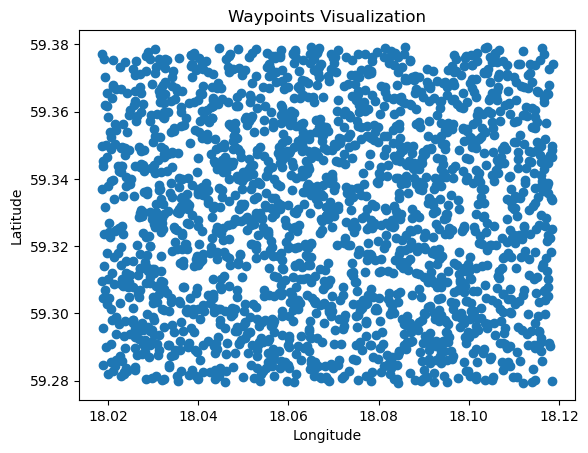

In [165]:
import matplotlib.pyplot as plt

# Extract coordinates from the GeoDataFrame
points = gdf['geometry']

# Extract x and y coordinates from each point
x_coords = [point.x for point in points]
y_coords = [point.y for point in points]

# Create a scatter plot
plt.scatter(x_coords, y_coords)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Waypoints Visualization')
plt.show()


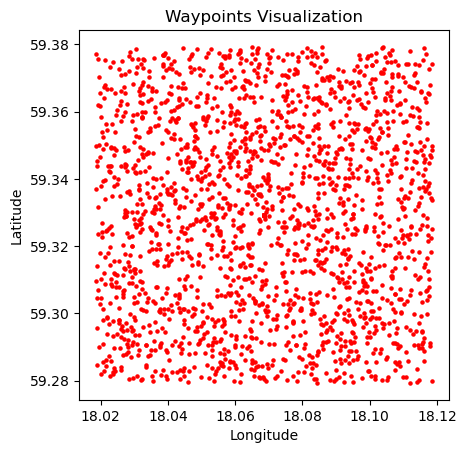

In [166]:
gdf.plot(marker='o', color='red', markersize=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Waypoints Visualization')
plt.show()
    

In [171]:
import folium

# Create a map centered around the average location of the waypoints
map_center = [sum(y_coords) / len(y_coords), sum(x_coords) / len(x_coords)]
mymap = folium.Map(location=map_center, zoom_start=13)

# Add markers for each waypoint
for point in points:
    folium.Marker([point.y, point.x], popup='Waypoint').add_to(mymap)

# Display the map
mymap


In [141]:
X = np.array(df)

# Choose the number of clusters (e.g., based on the elbow method)
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Step 5: Analysis and Interpretation
# Analyze resulting clusters and interpret characteristics of users in each cluster
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [173]:
import folium

# Create a map centered around a specific location (e.g., Stockholm)
map_center = (59.3293, 18.0686)
mymap = folium.Map(location=map_center, zoom_start=13)

# Add markers for each cluster centroid
for cluster_id, centroid in enumerate(kmeans.cluster_centers_):
    folium.Marker([centroid[0], centroid[1]], popup=f'Cluster {cluster_id}', icon=folium.Icon(color='blue')).add_to(mymap)

# Save the map to an HTML file
mymap.save('cluster_map.html')

In [174]:
mymap